In [300]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [301]:
All_data = pd.read_csv('Data_for_UCI_named.csv')
All_data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


# Data Preprocessing

In [302]:
data = All_data.drop(['stabf'], axis=1)
data.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860


In [303]:
#Kolonların yüzde kaçında NaN var?
data.isnull().sum()/len(data)*100

tau1    0.0
tau2    0.0
tau3    0.0
tau4    0.0
p1      0.0
p2      0.0
p3      0.0
p4      0.0
g1      0.0
g2      0.0
g3      0.0
g4      0.0
stab    0.0
dtype: float64

In [304]:
data.describe()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,3.750000,-1.250000,-1.250000,-1.250000,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.752160,0.433035,0.433035,0.433035,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,1.582590,-1.999891,-1.999945,-1.999926,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,3.218300,-1.624901,-1.625025,-1.624960,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,3.751025,-1.249966,-1.249974,-1.250007,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,4.282420,-0.874977,-0.875043,-0.875065,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,5.864418,-0.500108,-0.500072,-0.500025,0.999937,0.999944,0.999982,0.999930,0.109403


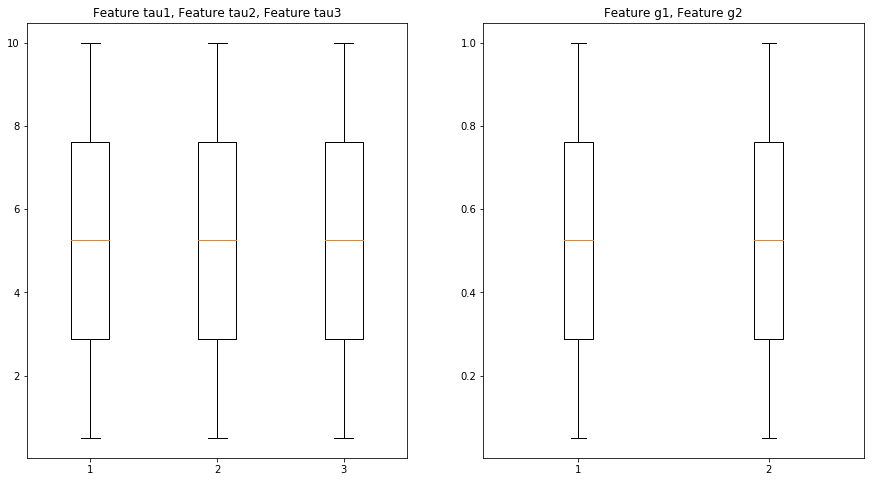

In [305]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

plt.figure(figsize=[15,8])
plt.subplot(121)
plt.boxplot([data['tau1'],data['tau2'], data['tau3']])
plt.title('Feature tau1, Feature tau2, Feature tau3')

plt.subplot(122)
plt.boxplot([data['g1'],data['g2']])
plt.title('Feature g1, Feature g2')

plt.show()

# Correlation betweeen features

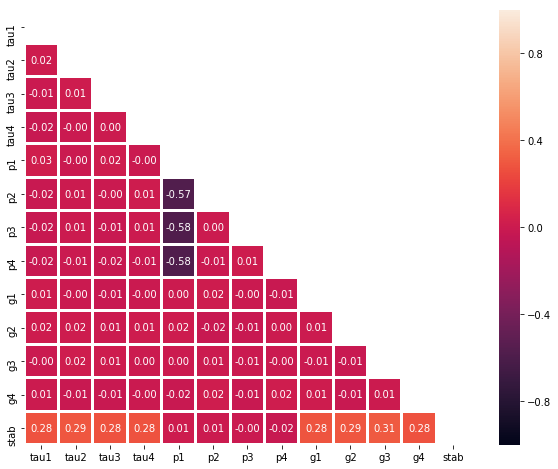

In [306]:
import seaborn as sns
correlations = data.corr()
plt.subplots(figsize=(10,8))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, xticklabels=data.columns, yticklabels=data.columns, 
            mask=mask,annot=True,linewidths=2, vmin=-1, fmt=".2f")
plt.show()

Text(0.5, 1.0, 'Relation between p2 and stab columns')

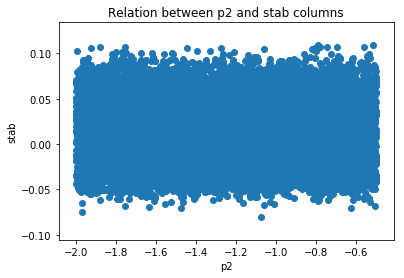

In [309]:
plt.scatter(data['p2'], data['stab'])
plt.xlabel('p2')
plt.ylabel('stab')
plt.title('Relation between p2 and stab columns')

Text(0.5, 1.0, 'Relation between p3 and stab columns')

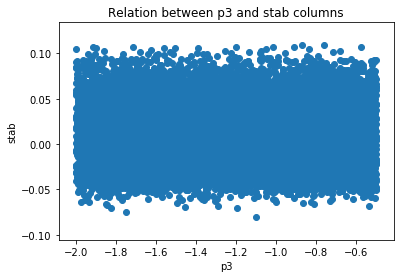

In [308]:
plt.scatter(data['p3'], data['stab'])
plt.xlabel('p3')
plt.ylabel('stab')
plt.title('Relation between p3 and stab columns')

Text(0.5, 1.0, 'Relation between p4 and stab columns')

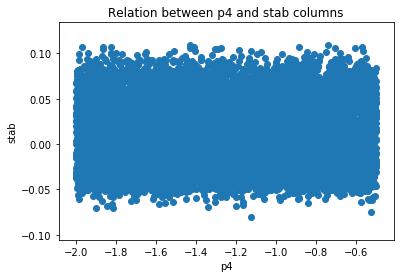

In [310]:
plt.scatter(data['p4'], data['stab'])
plt.xlabel('p4')
plt.ylabel('stab')
plt.title('Relation between p4 and stab columns')

In [239]:
data = All_data.drop(['p1', 'p2', 'p3', 'p4','stabf'], axis=1)
data.head()

,tau1,tau2,tau3,tau4,g1,g2,g3,g4,stab
0,2.959060,3.079885,8.381025,9.780754,0.650456,0.859578,0.887445,0.958034,0.055347
1,9.304097,4.902524,3.047541,1.369357,0.413441,0.862414,0.562139,0.781760,-0.005957
2,8.971707,8.848428,3.046479,1.214518,0.163041,0.766689,0.839444,0.109853,0.003471
3,0.716415,7.669600,4.486641,2.340563,0.446209,0.976744,0.929381,0.362718,0.028871
4,3.134112,7.608772,4.943759,9.857573,0.797110,0.455450,0.656947,0.820923,0.049860


In [240]:
data.describe()

,tau1,tau2,tau3,tau4,g1,g2,g3,g4,stab
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5.250000,5.250001,5.250004,5.249997,0.525000,0.525000,0.525000,0.525000,0.015731
std,2.742548,2.742549,2.742549,2.742556,0.274256,0.274255,0.274255,0.274255,0.036919
min,0.500793,0.500141,0.500788,0.500473,0.050009,0.050053,0.050054,0.050028,-0.080760
25%,2.874892,2.875140,2.875522,2.874950,0.287521,0.287552,0.287514,0.287494,-0.015557
50%,5.250004,5.249981,5.249979,5.249734,0.525009,0.525003,0.525015,0.525002,0.017142
75%,7.624690,7.624893,7.624948,7.624838,0.762435,0.762490,0.762440,0.762433,0.044878
max,9.999469,9.999837,9.999450,9.999443,0.999937,0.999944,0.999982,0.999930,0.109403


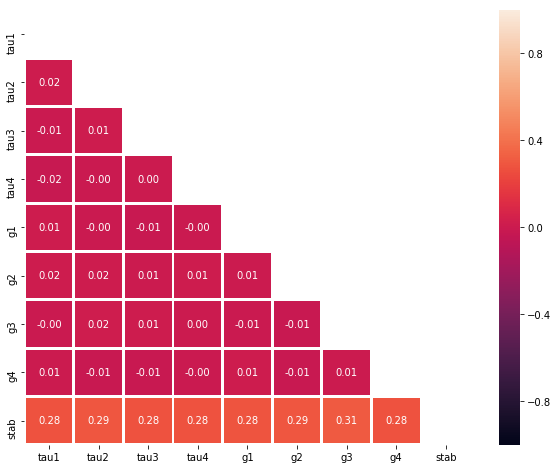

In [241]:
import seaborn as sns
correlations = data.corr()
plt.subplots(figsize=(10,8))
mask = np.zeros_like(correlations)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(correlations, xticklabels=data.columns, yticklabels=data.columns, 
            mask=mask,annot=True,linewidths=2, vmin=-1, fmt=".2f")
plt.show()

# Linear model assumptions

In [242]:
from sklearn.linear_model import Ridge,Lasso
from sklearn.model_selection import train_test_split
X_data= data.drop(['stab'], axis=1)
y_data = data['stab']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.30, random_state=0)

In [244]:
lm = Ridge(alpha=1)
lm.fit(X_train, y_train)
lm.intercept_, lm.coef_

(-0.1440844348279144,
 array([0.00366769, 0.00372828, 0.00373884, 0.00384652, 0.03802068,
        0.03814548, 0.04098049, 0.03736511]))

### (1) nearly normal residuals

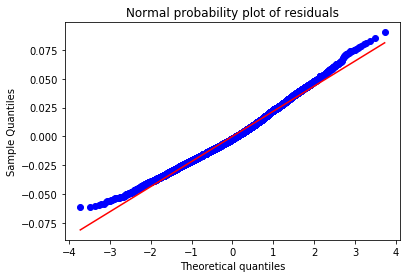

In [245]:
from scipy import stats
import matplotlib.pyplot as plt

predicted_values = lm.predict(X_train)
residuals = predicted_values - y_train

stats.probplot(residuals, plot=plt)
plt.ylabel('Sample Quantiles')
plt.title('Normal probability plot of residuals')
plt.show()

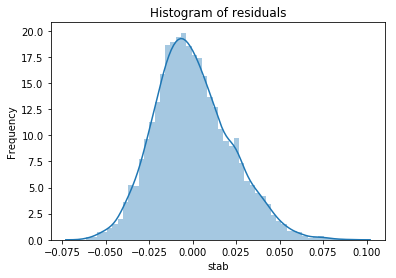

In [246]:
sns.distplot(residuals)
plt.ylabel('Frequency')
plt.title('Histogram of residuals')
plt.show()

### (2) constant variability in residuals

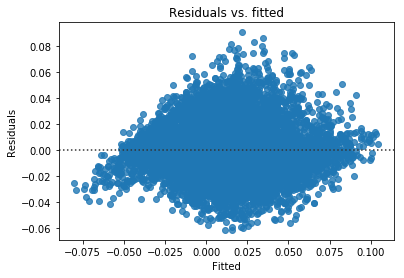

In [247]:
sns.residplot(predicted_values, residuals)
plt.title('Residuals vs. fitted')
plt.xlabel('Fitted')
plt.ylabel('Residuals')
plt.show()

### (3) linear relationships

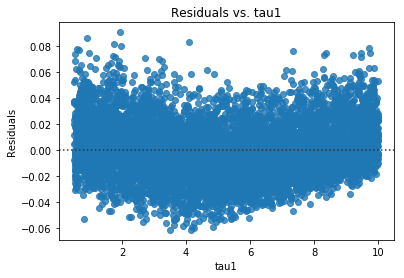

In [315]:
sns.residplot(X_train['tau1'], residuals)
plt.title('Residuals vs. tau1')
plt.xlabel('tau1')
plt.ylabel('Residuals')
plt.show()

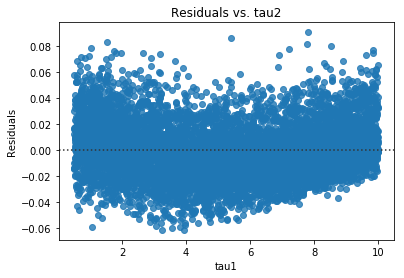

In [249]:
sns.residplot(X_train['tau2'], residuals)
plt.title('Residuals vs. tau2')
plt.xlabel('tau1')
plt.ylabel('Residuals')
plt.show()

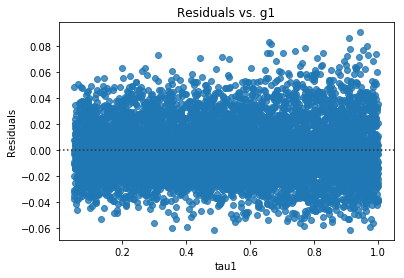

In [250]:
sns.residplot(X_train['g1'], residuals)
plt.title('Residuals vs. g1')
plt.xlabel('tau1')
plt.ylabel('Residuals')
plt.show()

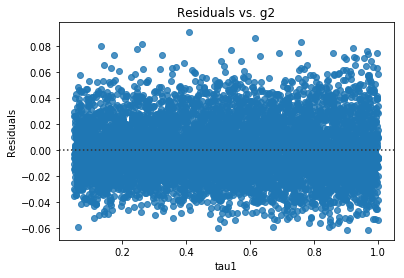

In [251]:
sns.residplot(X_train['g2'], residuals)
plt.title('Residuals vs. g2')
plt.xlabel('tau1')
plt.ylabel('Residuals')
plt.show()

## Dimensional Reduction for visualisation

In [252]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X_normalized = StandardScaler().fit(data).transform(data)
pca = PCA(n_components=2)
pca.fit(X_normalized)
data_2d = pca.transform(X_normalized)
data_2d = pd.DataFrame(data_2d)
#data_2d.index = data.index
data_2d.columns = ['PC1','PC2']
data_2d.head()

,PC1,PC2
0,2.176032,-0.308317
1,-0.140641,1.298351
2,-0.240229,-0.969429
3,0.379432,-1.267671
4,1.623930,0.194355


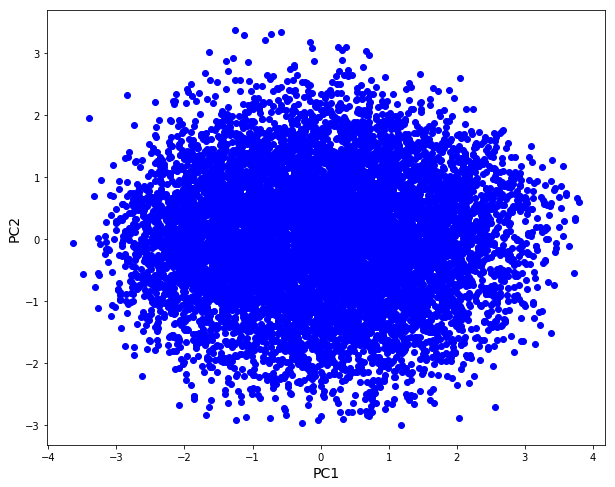

In [253]:
import pylab as pl
pl.figure(figsize=[10,8])
pl.scatter(data_2d.iloc[:,0], data_2d.iloc[:,1], c='blue')
plt.xlabel("PC1", fontsize=14)
plt.ylabel("PC2", fontsize=14)
pl.show()

# Ridge Regression

In [316]:
X_train.columns

Index(['tau1', 'tau2', 'tau3', 'tau4', 'g1', 'g2', 'g3', 'g4'], dtype='object')

In [317]:
lm = Ridge(alpha=0.1, normalize=True)
lm.fit(X_train, y_train)
lm.intercept_, lm.coef_

(-0.12967227343011142,
 array([0.00333636, 0.00339328, 0.003408  , 0.00348361, 0.03454662,
        0.03480644, 0.03733388, 0.03397182]))

In [318]:
lm.score(X_train, y_train)

0.6389459346369715

In [319]:
lm.score(X_test, y_test)

0.6477869331575062

# Lasso Regression

In [320]:
lm = Lasso(alpha=0.001)
lm.fit(X_train, y_train)
lm.intercept_, lm.coef_

(-0.11339272628988797,
 array([0.00356617, 0.00359972, 0.00361873, 0.00368809, 0.02481787,
        0.02463651, 0.02748772, 0.02415571]))

In [321]:
lm.score(X_train, y_train)

0.604233820095678

In [322]:
lm.score(X_test, y_test)

0.6107708279222244

# Linear Regression

In [323]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression(normalize=True)
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [324]:
lm.score(X_train, y_train)

0.6442915520636209

In [325]:
lm.score(X_test, y_test)

0.6523181125759112

# Using Polynomial Features 

In [326]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_F1_poly = poly.fit_transform(X_data)

In [327]:
pd.DataFrame(X_F1_poly).head()

,0,1,2,3,4,5,6,7,8,9,...,35,36,37,38,39,40,41,42,43,44
0,1.0,2.959060,3.079885,8.381025,9.780754,0.650456,0.859578,0.887445,0.958034,8.756036,...,0.423094,0.559118,0.577244,0.623159,0.738875,0.762828,0.823505,0.787558,0.850202,0.917829
1,1.0,9.304097,4.902524,3.047541,1.369357,0.413441,0.862414,0.562139,0.781760,86.566225,...,0.170933,0.356557,0.232411,0.323211,0.743758,0.484797,0.674201,0.316000,0.439458,0.611149
2,1.0,8.971707,8.848428,3.046479,1.214518,0.163041,0.766689,0.839444,0.109853,80.491525,...,0.026582,0.125002,0.136864,0.017911,0.587811,0.643592,0.084223,0.704666,0.092216,0.012068
3,1.0,0.716415,7.669600,4.486641,2.340563,0.446209,0.976744,0.929381,0.362718,0.513250,...,0.199102,0.435832,0.414698,0.161848,0.954029,0.907767,0.354282,0.863748,0.337103,0.131564
4,1.0,3.134112,7.608772,4.943759,9.857573,0.797110,0.455450,0.656947,0.820923,9.822655,...,0.635384,0.363043,0.523658,0.654366,0.207435,0.299206,0.373890,0.431579,0.539303,0.673915


In [328]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_F1_poly, y_data, random_state=0)
lm = LinearRegression(normalize=True)
lm.fit(X_train2, y_train2)
lm.score(X_train2, y_train2)

0.8892782393408589

## Parameter Tunning

### Linear Regression

In [329]:
#degree = 2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', LinearRegression(normalize=True))])

cv_scores = cross_val_score(pipe, X_train, y_train)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.89139185 0.88346069 0.88264578]
Mean cross-validation score (5-fold): 0.886


In [330]:
##### degree = 3
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression(normalize=True))])

cv_scores = cross_val_score(pipe, X_train, y_train)
print('Cross-validation scores (5-fold):', cv_scores)
print('Mean cross-validation score (5-fold): {:.3f}'.format(np.mean(cv_scores)))

Cross-validation scores (5-fold): [0.94889465 0.94426297 0.94532763]
Mean cross-validation score (5-fold): 0.946


__linear regression with best parameter__

In [331]:
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_data)
X_train_p, X_test_p, y_train_p, y_test_p = train_test_split(X_F1_poly, y_data, test_size=0.30, random_state=0)

regr =  LinearRegression(normalize=True)
regr.fit(X_train_p, y_train_p)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [332]:
from sklearn.metrics import mean_squared_error
print("Mean_squared_error: %.5f" % mean_squared_error(y_test_p, regr.predict(X_test_p)))

from sklearn.metrics import r2_score # R² score, the coefficient of determination
print("r2_score: %.3f" % r2_score(y_test_p, regr.predict(X_test_p)))

Mean_squared_error: 0.00007
r2_score: 0.947


In [341]:
regr.score(X_train_p, y_train_p)

0.9498599695875996

### Ridge Regression

In [333]:
#polynomial degree = 2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', Ridge(normalize=True))])
param_grid = {'linear__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}
search = GridSearchCV(pipe, param_grid=param_grid,cv=5) 
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.886):
{'linear__alpha': 0.001}


In [334]:
#polynomial degree = 3
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', Ridge(normalize=True))])
param_grid = {'linear__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}
search = GridSearchCV(pipe, param_grid=param_grid,cv=5) 
search.fit(X_train, y_train)

print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.941):
{'linear__alpha': 0.001}


__Ridge regression with best parameter__

In [350]:
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_data)

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_F1_poly, y_data, test_size=0.30, random_state=0)
regr2 = Ridge(alpha=0.001, normalize=True)
regr2.fit(X_train_r, y_train_r)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=None, solver='auto', tol=0.001)

In [351]:
regr2.score(X_train_r, y_train_r)

0.9442413912541472

In [352]:
from sklearn.metrics import mean_squared_error
print("Mean_squared_error: %.5f" % mean_squared_error(y_test_r, regr2.predict(X_test_r)))

from sklearn.metrics import r2_score # R² score, the coefficient of determination
print("r2_score: %.3f" % r2_score(y_test_r, regr2.predict(X_test_r)))

Mean_squared_error: 0.00008
r2_score: 0.944


### Lasso Regression

In [337]:
#degree = 2
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=2)),
                  ('linear', Lasso())])
param_grid = {'linear__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}
search = GridSearchCV(pipe, param_grid=param_grid,cv=5) 
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.859):
{'linear__alpha': 0.001}


In [338]:
#degree = 3
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

pipe = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', Lasso())])
param_grid = {'linear__alpha': [0.001, 0.01, 0.05, 0.1, 1, 10]}
search = GridSearchCV(pipe, param_grid=param_grid,cv=5) 
search.fit(X_train, y_train)
print("Best parameter (CV score=%0.3f):" % search.best_score_)
print(search.best_params_)

Best parameter (CV score=0.892):
{'linear__alpha': 0.001}


__Lasso regression with best parameter__

In [347]:
poly = PolynomialFeatures(degree=3)
X_F1_poly = poly.fit_transform(X_data)

X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(X_F1_poly, y_data, test_size=0.30, random_state=0)
regr3 = Lasso(alpha=0.001)
regr3.fit(X_train_l, y_train_l)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [348]:
regr3.score(X_train_l, y_train_l)

0.8949851513869478

In [349]:
from sklearn.metrics import mean_squared_error
print("Mean_squared_error: %.5f" % mean_squared_error(y_test_l, regr3.predict(X_test_l)))

from sklearn.metrics import r2_score # R² score, the coefficient of determination
print("r2_score: %.3f" % r2_score(y_test_l, regr3.predict(X_test_l)))

Mean_squared_error: 0.00015
r2_score: 0.895


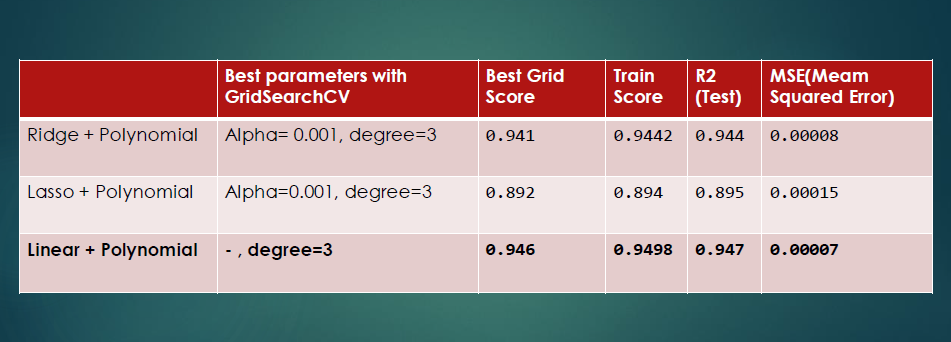

In [2]:
from IPython.display import Image
Image(filename='Resulst.png') 